In [1]:
import glob
import os
import random

from matplotlib import pyplot as plt
from skimage import io

from data_visualization.vqa_interface import VQA

### Google Drive Data Directory

In [2]:
data_dir = "/Users/patrickkollman/Google Drive/My Drive/VQA/data"

### Training Images

In [3]:
train_img_dir = f"{data_dir}/Images/train2014"
train_img_file_paths = list(set(glob.glob(f"{train_img_dir}/*.jpg")))
print(f"{len(train_img_file_paths)} images in {train_img_dir}")

82783 images in /Users/patrickkollman/Google Drive/My Drive/VQA/data/Images/train2014


### Load Questions and Answers into VQA interface

In [4]:
ques_file = f"{data_dir}/Questions/v2_OpenEnded_mscoco_train2014_questions.json"
ann_file = f"{data_dir}/Answers/v2_mscoco_train2014_annotations.json"

In [5]:
vqa = VQA(question_file=ques_file, annotation_file=ann_file)

Loading VQA questions and annotations into memory...
Creating index...
Index created!
Image to QA index created with 82783 entries.
Question to Answer index created with 443757 entries.
Question index created with 443757 entries.


### Load and display QA annotations for given answer types

In [6]:
def visualize_random_sample(
    vqa: VQA,
    img_ids: list[int] | int = [],
    ques_types: list[str] | str = [],
    ans_types: list[str] | str = [],
) -> None:
    """Visualize a Random VQA sample.

    :param vqa: VQA data interface
    :param image_ids: filter by specific image ids
    :param ques_types: filter bu VQA question type
        All possible quesTypes for abstract and mscoco has been provided
        in respective text files in ../VQA/QuestionTypes/
    :param ans_types: filter by VQA answer type
        'ans_types' can be one of the following: "yes/no", "number", "other"
    """
    # Get Question IDs for 'ques_type'
    question_ids = vqa.get_ques_ids(img_ids=img_ids, ques_types=ques_types, ans_types=ans_types)
    qa = vqa.load_qa(question_ids)

    # Choose a random Question and print its Annotations
    random_qa = random.choice(qa)
    vqa.show_qa([random_qa])

    # Plot Image
    img_id = random_qa["image_id"]
    img_filename = f"COCO_train2014_{str(img_id).zfill(12)}.jpg"
    img_file_path = f"{train_img_dir}/{img_filename}"
    if os.path.isfile(img_file_path):
        I = io.imread(img_file_path)
        plt.imshow(I)
        plt.axis("off")
        plt.show()

### "How Many?"

Question: How many chairs are there?
Answer 1: 2
Answer 2: 100
Answer 3: 3
Answer 4: 2
Answer 5: 2
Answer 6: 300
Answer 7: 3
Answer 8: 2
Answer 9: 50
Answer 10: 100


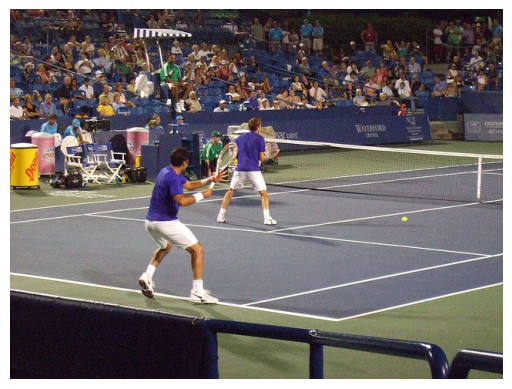

In [10]:
visualize_random_sample(vqa=vqa, ques_types="how many")

Question: Are the dogs fighting over the frisbee?
Answer 1: no
Answer 2: no
Answer 3: no
Answer 4: yes
Answer 5: no
Answer 6: yes
Answer 7: no
Answer 8: no
Answer 9: no
Answer 10: no


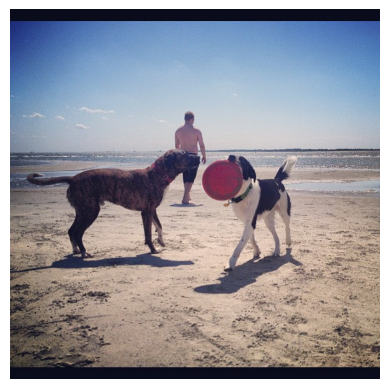

In [11]:
visualize_random_sample(vqa=vqa, ans_types="yes/no")

### By Specific Image IDs

Question: Can a person sit backwards, brush their teeth and go potty at the same time?
Answer 1: yes
Answer 2: no
Answer 3: yes
Answer 4: no
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: no
Answer 9: no
Answer 10: yes


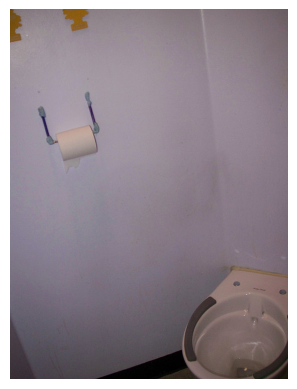

In [9]:
ids = vqa.get_img_ids()
visualize_random_sample(vqa=vqa, img_ids=random.sample(ids, 5))